<a href="https://colab.research.google.com/github/Kunaltembhare003/NYC-taxi-trip-time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - The Dataset contains 1458644 trip records


### Data fields
* #### id - A unique identifier for each trip.
* #### vendor_id - A code indicating the provider associated with the trip record.
* #### pickup_datetime - Date and time when the meter was engaged.
* #### dropoff_datetime - Date and time when the meter was disengaged.
* #### passenger_count - The number of passengers in the vehicle. (driver entered value)
* #### pickup_longitude - The longitude where the meter was engaged.
* #### pickup_latitude - The latitude where the meter was engaged.
* #### dropoff_longitude - The longitude where the meter was disengaged.
* #### dropoff_latitude - The latitude where the meter was disengaged.
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.
* #### trip_duration - Duration of the trip in seconds. (Target variable)

## **Import Libraries**

In [ ]:
# Import Required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.simplefilter('ignore')

## **Mounting Google Drive**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## **Data Loading**

In [ ]:
# Load The data set with pandas
data= pd.read_csv("/content/drive/MyDrive/Alma Better/AlmaBetter CapstoneProject/NYC Taxi Time Prediction Project/NYC Taxi Data.csv")

In [ ]:
# Showing top 5 rows of the data
data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# Getting the overview information of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


So we have 1458644 rows and 11 columns.

4 categorical type and rest are numerical type.

In [ ]:
# Check for null values
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Great no Null Values.

In [ ]:
# Converting into pandas datetime format
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

## **Feature Creation**

In [ ]:
# Creating features form datetime
data['pickup_weekday']=data['pickup_datetime'].dt.day_name()
data['dropoff_weekday']=data['dropoff_datetime'].dt.day_name()
data['pickup_weekday_num']=data['pickup_datetime'].dt.weekday
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['month']=data['pickup_datetime'].dt.month

In [ ]:
# Showing the top 5 rows
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,dropoff_weekday,pickup_weekday_num,pickup_hour,month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,17,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,19,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,13,3


Finding Distance by using pickup_lat,pickup_long,dropoff_lat,dropoff_long values

In [ ]:
# Importing geopy for finding distance
from geopy.distance import great_circle

In [ ]:
# Function to find distace with given latitude and longitude coordinates
def find_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start=(pickup_lat,pickup_long)
 end=(dropoff_lat,dropoff_long)
 
 return great_circle(start,end).km

In [ ]:
# Finding the distanceby using find_distance function
data['distance'] = data.apply(lambda x: find_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [ ]:
# Top 5 trip duration values in seconds
data.trip_duration.head()

0     455
1     663
2    2124
3     429
4     435
Name: trip_duration, dtype: int64

Now we can find speed

In [ ]:
# Finding speed from distance and time
data['speed'] = (data.distance/(data.trip_duration/3600))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_weekday      1458644 non-null  object        
 12  dropoff_weekday     1458644 non-null  object        
 13  pickup_weekd

In [ ]:
# Fubction to convert pickup_hour into time of day
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [ ]:
data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,dropoff_weekday,pickup_weekday_num,pickup_hour,month,distance,speed,pickup_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,17,3,1.498523,11.856445,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,0,6,1.805510,9.803673,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,11,1,6.385108,10.822216,Morning
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,19,4,1.485501,12.465739,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,13,3,1.188590,9.836608,Afternoon


## **Univariate Analysis**

### Trip Duration

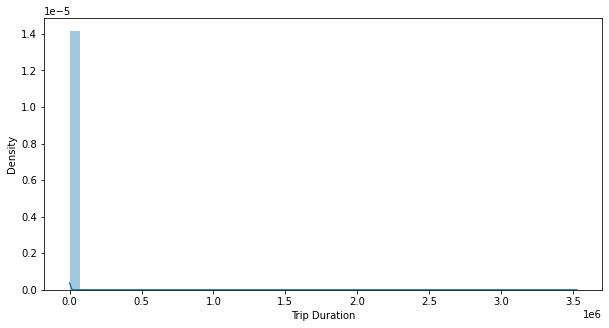

In [ ]:
#plotting target variable trip duration
plt.figure(figsize = (10,5))
sns.distplot(data['trip_duration'])
plt.xlabel('Trip Duration')
plt.show()

Since trip duration looks skewed we can apply log10 tomake it normal distribution

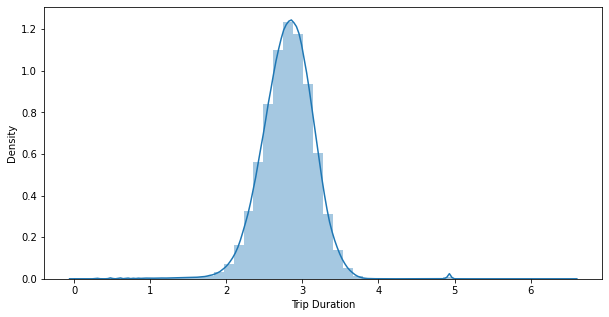

In [ ]:
# Checking the log distribution
plt.figure(figsize = (10,5))
sns.distplot(np.log10(data['trip_duration']))
plt.xlabel('Trip Duration')
plt.show()

Finding outliers

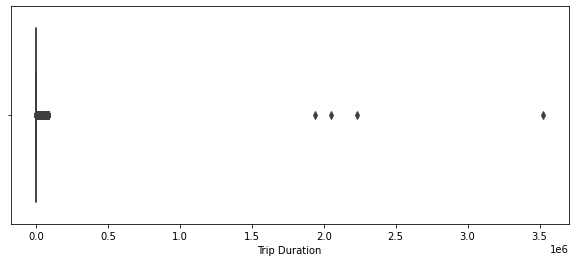

In [ ]:
# Box plot for outlier checking
plt.figure(figsize = (10,4))
sns.boxplot(data.trip_duration)
plt.xlabel('Trip Duration')
plt.show()

In [ ]:
print('0 percentile value is ',duration.min())

0 percentile value is  1


In [ ]:
print('100 percentile value is',duration.max())

100 percentile value is 3526282


In [ ]:
# Finding the percentile values
for i in range(0,100,5):
  duration= data['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print('100 percentile value is',duration.max())

0 percentile value is 1
5 percentile value is 180
10 percentile value is 245
15 percentile value is 298
20 percentile value is 348
25 percentile value is 397
30 percentile value is 446
35 percentile value is 496
40 percentile value is 548
45 percentile value is 603
50 percentile value is 662
55 percentile value is 727
60 percentile value is 798
65 percentile value is 877
70 percentile value is 968
75 percentile value is 1075
80 percentile value is 1208
85 percentile value is 1383
90 percentile value is 1634
95 percentile value is 2104
100 percentile value is 3526282


In [ ]:
# Finding the percentile values
for i in range(95,100):
  duration= data['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

95 percentile value is 2104
96 percentile value is 2273
97 percentile value is 2497
98 percentile value is 2829
99 percentile value is 3440
100 percentile value is  3526282


100 percentile value is clearly out of range

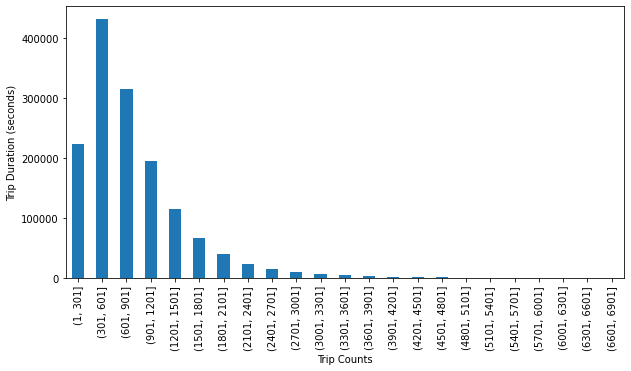

In [ ]:
# No.of trips taken in periods of 5 min gaps
plt.figure(figsize = (10,5))
data.trip_duration.groupby(pd.cut(data.trip_duration, np.arange(1,7200,300))).count().plot(kind='bar')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

There are very few trips which have duration greater than 4800 seconds.

we should get rid of data having trip duration greater than 4800 seconds and also trip duration less than 60 seconds)

In [ ]:
# Outlier elimination
data = data[data.trip_duration <= 4800]
data = data[data.trip_duration >= 60]

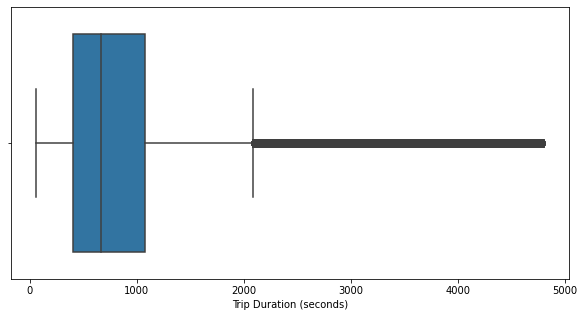

In [ ]:
# Box Plot
plt.figure(figsize = (10,5))
sns.boxplot(data.trip_duration)
plt.xlabel('Trip Duration (seconds)')
plt.show()

*   We can observe that most of the trips took 0 - 30 mins (2000 seconds) to complete

### Trips per Time of Day

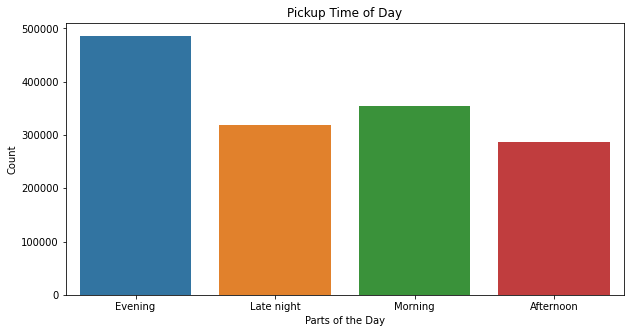

In [ ]:
# Bar graph for parts of the day
plt.figure(figsize = (10,5))
sns.countplot(x="pickup_timeofday",data=data)
plt.title('Pickup Time of Day')
plt.xlabel('Parts of the Day')
plt.ylabel('Count')
plt.show()

* Seems like evenigs have the most number of trips

### Vendor ID

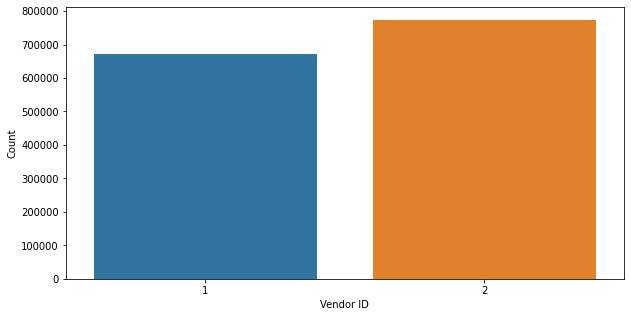

In [ ]:
# Bar grapgh for vendorID
plt.figure(figsize = (10,5))
sns.countplot(data.vendor_id)
plt.xlabel('Vendor ID')
plt.ylabel('Count')
plt.show()

* Not very much great difference

### Passenger Count

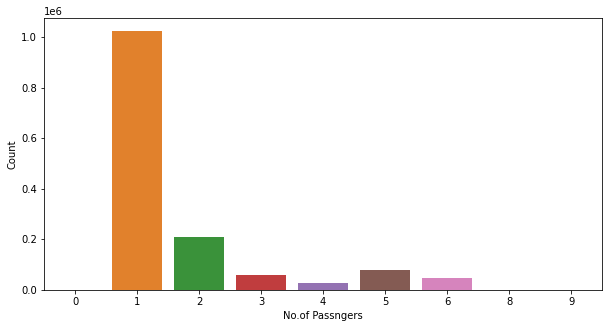

In [ ]:
# Bar graph for passenger Count
plt.figure(figsize = (10,5))
sns.countplot(x='passenger_count',data=data)
plt.ylabel('Count')
plt.xlabel('No.of Passngers')
plt.show()

* Let us remove the rows which have 0 or greater than 6 passenger count

In [ ]:
# Outlier Elimination
data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

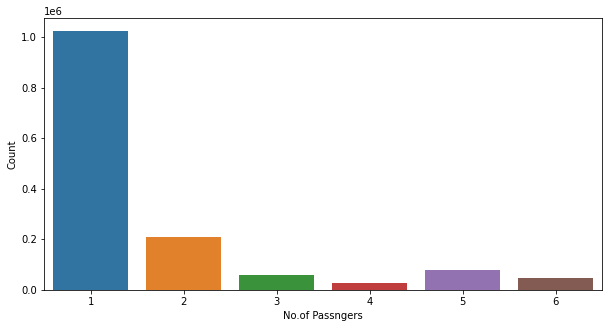

In [ ]:
# Bar graph after outlier removal
plt.figure(figsize = (10,5))
sns.countplot(x='passenger_count',data=data)
plt.ylabel('Count')
plt.xlabel('No.of Passngers')
plt.show()

* Wee can see that highest amount of trips were taken by single passengers

### Store and Forward Flag

In [ ]:
# Checking the value counts
data['store_and_fwd_flag'].value_counts()

N    1437924
Y       7846
Name: store_and_fwd_flag, dtype: int64

In [ ]:
# printing the percentage of value counts
data['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994573
Y    0.005427
Name: store_and_fwd_flag, dtype: float64

*   We can see that only about 1% of the trip details were stored in the vehicle memory first

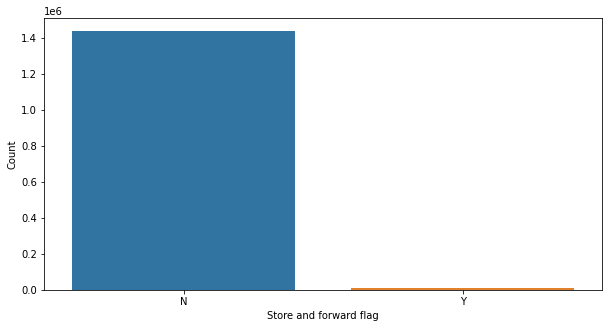

In [ ]:
# Bar graph
plt.figure(figsize = (10,5))
sns.countplot(x='store_and_fwd_flag',data=data)
plt.ylabel('Count')
plt.xlabel('Store and forward flag')
plt.show()

### Distance

In [ ]:
# Finding the percentile values
for i in range(0,100,10):
  distance= data['distance'].values
  distance= np.sort(distance, axis= None)
  print("{} percentile value is {}".format(i, distance[int(len(distance)*(float(i)/100))]))
print('100 percentile value is',distance.max())

0 percentile value is 0.0
10 percentile value is 0.8093061824130643
20 percentile value is 1.1026472610520168
30 percentile value is 1.39058872417481
40 percentile value is 1.716615188182333
50 percentile value is 2.103475699940145
60 percentile value is 2.6056675665794966
70 percentile value is 3.343154788968105
80 percentile value is 4.61962459854144
90 percentile value is 7.593696297990768
100 percentile value is 1240.9104296218293


In [ ]:
# Finding the percentile values
for i in range(90,100):
  distance= data['distance'].values
  distance= np.sort(distance, axis= None)
  print("{} percentile value is {}".format(i, distance[int(len(distance)*(float(i)/100))]))
print('100 percentile value is',distance.max())

90 percentile value is 7.593696297990768
91 percentile value is 8.207780822339672
92 percentile value is 8.841237389244656
93 percentile value is 9.4106389538407
94 percentile value is 10.015202848603936
95 percentile value is 10.90093839508433
96 percentile value is 12.59665017604999
97 percentile value is 15.069118743415903
98 percentile value is 19.11293911352718
99 percentile value is 20.711628319423614
100 percentile value is 1240.9104296218293


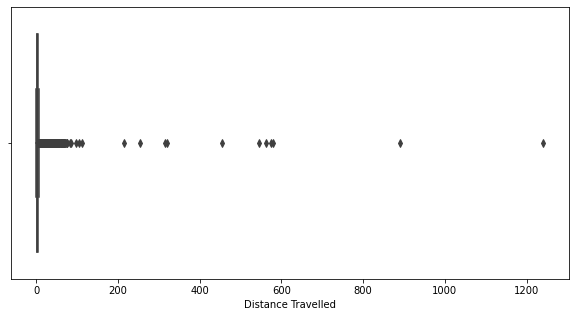

In [ ]:
# Box Plot
plt.figure(figsize = (10,5))
sns.boxplot(data.distance)
plt.xlabel('Distance Travelled')
plt.show()

* Since we removed the data having greater than 80 min(4800sec) so we can remove the distance travelled > 100 km, and we seen that 99 percentile of the distance travelled is about 24 km

In [ ]:
# Removing outliers
data = data[data.distance <= 100]
data = data[data.distance >=1 ]

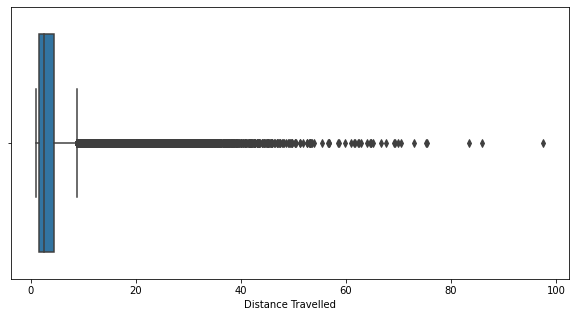

In [ ]:
# Checking Box Plot
plt.figure(figsize = (10,5))
sns.boxplot(data.distance)
plt.xlabel('Distance Travelled')
plt.show()

### Speed

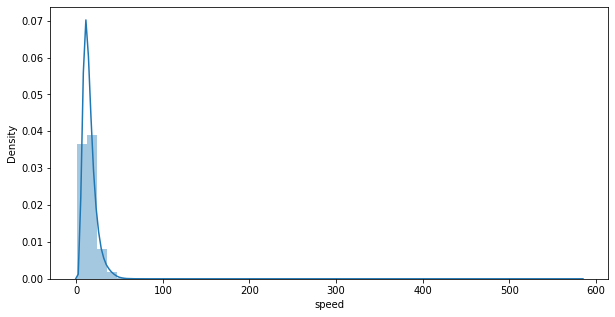

In [ ]:
# Check distribution plot
plt.figure(figsize = (10,5))
sns.distplot(data['speed'])
plt.xlabel('speed')
plt.show()

We can see that most of the speed ranges between 0 to 100 kmph

In [ ]:
# Check for percentile values
for i in range(0,100,5):
  speed= data['speed'].values
  speed= np.sort(speed, axis= None)
  print("{} percentile value is {}".format(i, speed[int(len(speed)*(float(i)/100))]))
print('100 percentile value is',speed.max())

0 percentile value is 0.7774622981972946
5 percentile value is 6.123078820561964
10 percentile value is 7.359069366433507
15 percentile value is 8.303554643948322
20 percentile value is 9.1244285537377
25 percentile value is 9.882297511300653
30 percentile value is 10.609765370790797
35 percentile value is 11.319329124081843
40 percentile value is 12.03176513232204
45 percentile value is 12.771327732602993
50 percentile value is 13.545938012292265
55 percentile value is 14.363268420760068
60 percentile value is 15.260577604607917
65 percentile value is 16.25167563096324
70 percentile value is 17.36250761520031
75 percentile value is 18.678093539350968
80 percentile value is 20.27957843604638
85 percentile value is 22.329769048727904
90 percentile value is 25.265542856507846
95 percentile value is 30.36110606966675
100 percentile value is 583.7351372418125


In [ ]:
# Check for percentile values
for i in range(95,100):
  speed= data['speed'].values
  speed= np.sort(speed, axis= None)
  print("{} percentile value is {}".format(i, speed[int(len(speed)*(float(i)/100))]))
print('100 percentile value is',speed.max())

95 percentile value is 30.36110606966675
96 percentile value is 32.03197998942145
97 percentile value is 34.1432325670317
98 percentile value is 37.05719430091841
99 percentile value is 41.501279136766
100 percentile value is 583.7351372418125


Now we can remove the data having speed greater than 50kmph(over speed is not legal) and less than 1kmph

In [ ]:
# removing outliers
data = data[data.speed <= 50]
data = data[data.speed >=1]

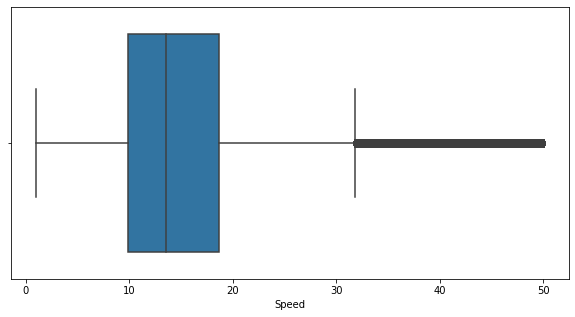

In [ ]:
# Box plot
plt.figure(figsize = (10,5))
sns.boxplot(data.speed)
plt.xlabel('Speed')
plt.show()

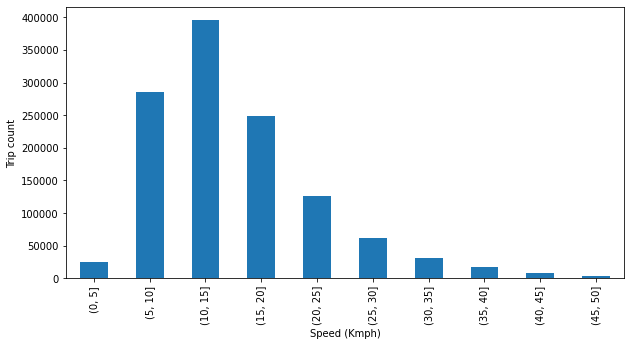

In [ ]:
# Bar graph with speed ranges
plt.figure(figsize = (10,5))
data.speed.groupby(pd.cut(data.speed, np.arange(0,55,5))).count().plot(kind ='bar')
plt.ylabel('Trip count')
plt.xlabel('Speed (Kmph)')
plt.show()

*   Mostly trips are done at a speed range of 5-25 kmph.


### Trips per Hour

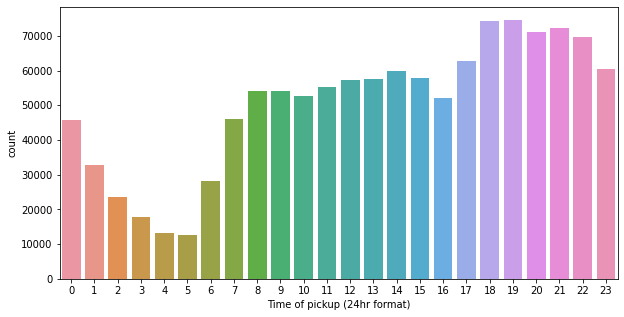

In [ ]:
# count plot 
plt.figure(figsize = (10,5))
sns.countplot(data.pickup_hour)
plt.xlabel('Time of pickup (24hr format)')
plt.show()

### Trips per week day

In [ ]:
# Check weekday counts
data.pickup_weekday.value_counts()

Saturday     184396
Friday       183799
Thursday     180067
Wednesday    172609
Tuesday      166384
Sunday       164670
Monday       154261
Name: pickup_weekday, dtype: int64

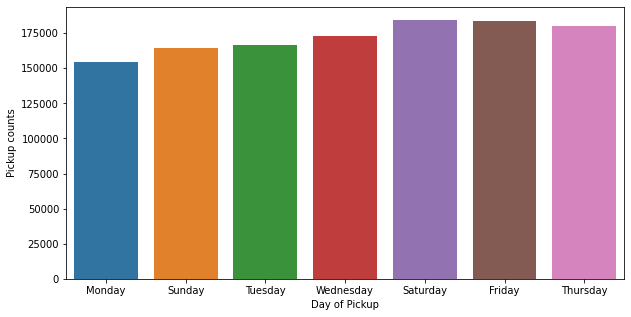

In [ ]:
# ploting value counts
plt.figure(figsize = (10,5))
sns.countplot(data.pickup_weekday)
plt.xlabel('Day of Pickup')
plt.ylabel('Pickup counts')
plt.show()

### Trips per month

In [ ]:
# Check month counts
data.month.value_counts()

3    212276
4    208444
5    206657
6    195063
2    194778
1    188968
Name: month, dtype: int64

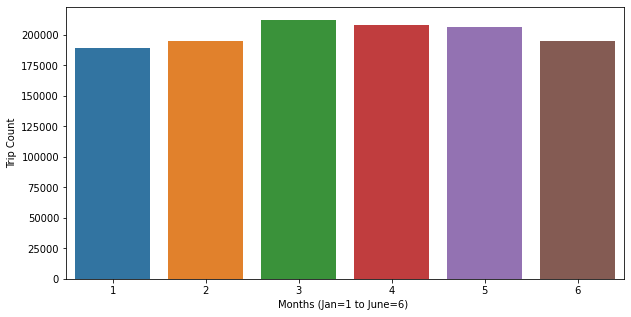

In [ ]:
# Ploting value counts
plt.figure(figsize = (10,5))
sns.countplot(data.month)
plt.ylabel('Trip Count')
plt.xlabel('Months (Jan=1 to June=6) ')
plt.show()

## **Initial Feature Engineering**

In [ ]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_weekday', 'dropoff_weekday',
       'pickup_weekday_num', 'pickup_hour', 'month', 'distance', 'speed',
       'pickup_timeofday'],
      dtype='object')

In [ ]:
# Making a copy of the data
df=data.copy()

In [ ]:
# Dropping the columns
df.drop(['id','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','pickup_datetime', 'dropoff_datetime','pickup_hour'],axis=1,inplace=True)

In [ ]:
# Checking the df shape
df.shape

(1206186, 11)

In [ ]:
len(df[df.pickup_weekday!=df.dropoff_weekday])/len(df)*100

1.12934489373944

* Only about 1.12% of pickup_weekday and dropoff_weekday are different which means mostly trip ends in same day itself.
* So we can drop dropoff_weekday feature also.

In [ ]:
# Dropping one more column
#we can also remove "pickup_weekday_num" as "pickup_weekday" and "dropoff_weekday" information also avalibale
df.drop(['pickup_weekday_num'],axis=1,inplace=True)

## **Bivariate Analysis**

### Trip Duration Vs Vendor

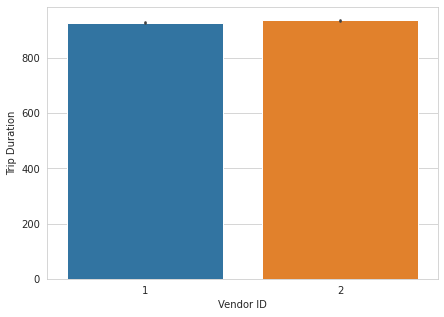

In [ ]:
# barplot of trip duration and vendor
sns.set_style(style='whitegrid')
plt.figure(figsize = (7,5))
sns.barplot(df.vendor_id,df.trip_duration)
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration')
plt.show()

* Seems like there is not much difference between Vendoe_ID type 1 and Vendor_ID type 2.

### Trip Duration Vs Store and Forward Flag

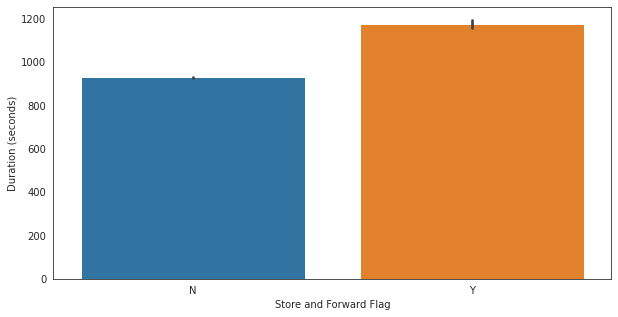

In [ ]:
# Barplot between trip duration and store and forward flag
plt.figure(figsize = (10,5))
sns.set_style(style='white')
sns.barplot(x=df.store_and_fwd_flag, y=df.trip_duration)
plt.xlabel('Store and Forward Flag')
plt.ylabel('Duration (seconds)')
plt.show()

* Y type Store and Forward Flag are relatively taking longer trip duration.
* Also we found that from univariate analysis only 1% data is having Y type Store and Forward Flag

### Trip Duration Vs Pickup Time

Text(0.5, 1.0, 'Line Plot')

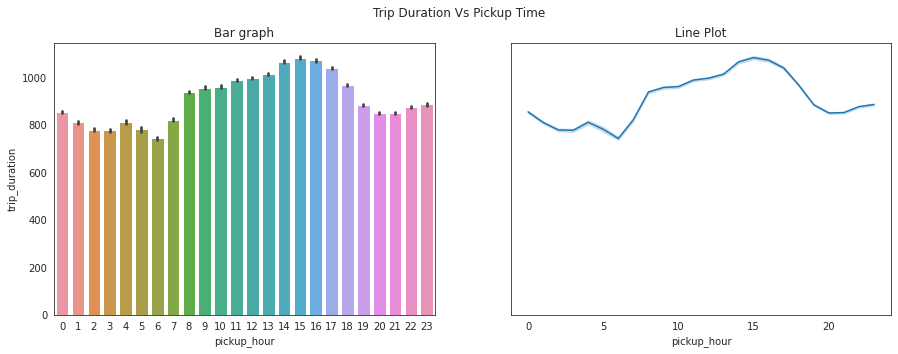

In [ ]:
# Making subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Trip Duration Vs Pickup Time')
# Bar graph
sns.barplot(ax=axes[0], x='pickup_hour',y='trip_duration',data=df)
axes[0].set_title('Bar graph')
# line graph
sns.lineplot(ax=axes[1], x='pickup_hour',y='trip_duration',data=df)
axes[1].set_title('Line Plot')

*   We see the trip duration is the maximum around 1 pm to 4 pm.
*   Trip duration is the lowest in morning aroud 6 am

### Trip Duration Vs Weekday

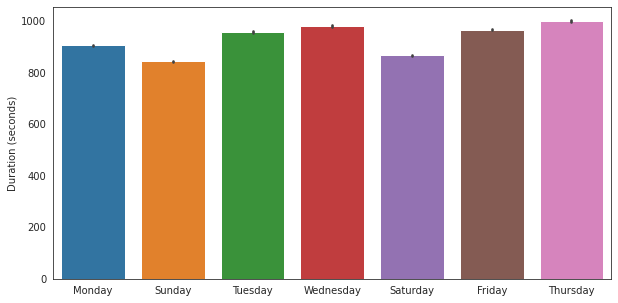

In [ ]:
# bar graph between trip duration and weekday
plt.figure(figsize = (10,5))
sns.barplot(x='pickup_weekday',y='trip_duration',data=df)
plt.ylabel('Duration (seconds)')
plt.xlabel('')
plt.show()

*   Trip duration on Wednesday is longest among all days.

### Trip Duration Vs Month

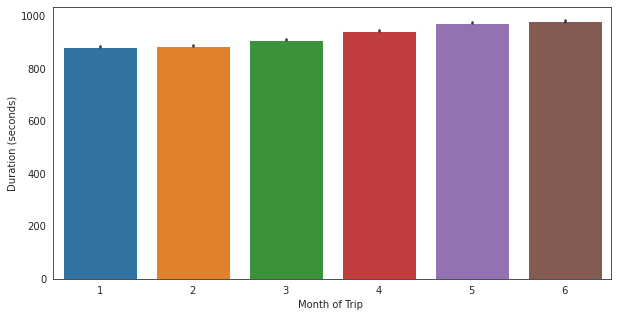

In [ ]:
# bar graph between trip duration and month
plt.figure(figsize = (10,5))
sns.barplot(x='month',y='trip_duration', data=data)
plt.ylabel('Duration (seconds)')
plt.xlabel('Month of Trip ')
plt.show()

* Trip duration gradually increasing from Jan to June

### Trip Duration Vs Distance

Text(0.5, 1.0, 'Scatter plot')

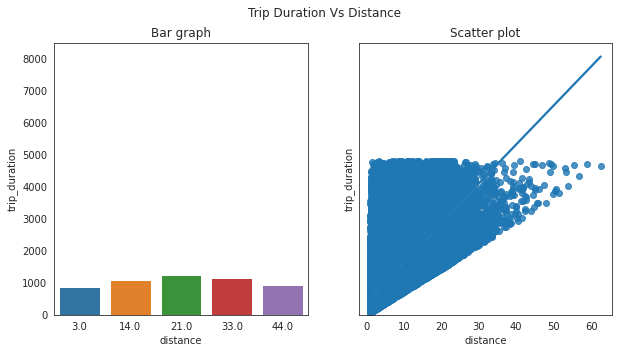

In [ ]:
# Setting multiple plots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.suptitle('Trip Duration Vs Distance')
# bar graph
sns.barplot(ax=axes[0], x=df.distance.groupby(pd.cut(df.distance, np.arange(0,60,10))).mean().round(),y='trip_duration',data=df,ci=None)
axes[0].set_title('Bar graph')
# Scatter plot
sns.regplot(ax=axes[1], x='distance',y='trip_duration',data=df)
axes[1].set_title('Scatter plot')

* As the distance increases the trip time also increasing

### Distance Vs Hour

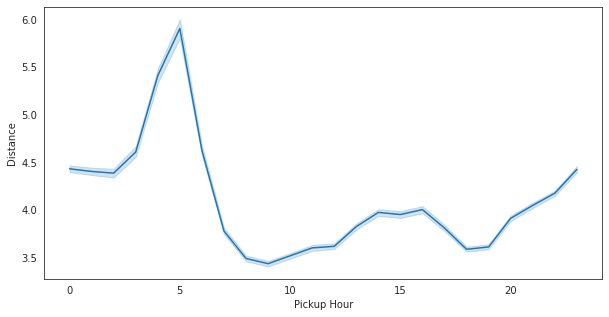

In [ ]:
# Line graph between distance and Hour
plt.figure(figsize = (10,5))
sns.lineplot(y='distance',x='pickup_hour',data=df)
plt.ylabel('Distance')
plt.xlabel('Pickup Hour')
plt.show()

*   Trip distance is highest during early morning hours.
*   From 8 am to night 8 pm distance people are riding short distance trips in the range of 3 - 4 kms.



### Distance vs Weekday

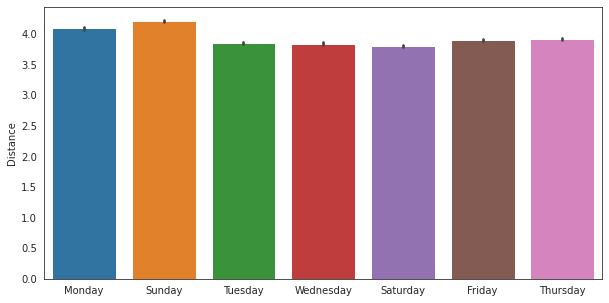

In [ ]:
# Barplot between distance and weekday
plt.figure(figsize = (10,5))
sns.barplot(x='pickup_weekday', y='distance',data=df)
plt.ylabel('Distance')
plt.xlabel('')
plt.show()

* Sunday being at the top may be due to outstation trips

### Distance Vs Month

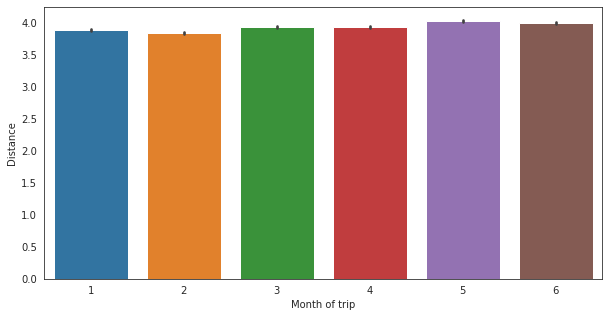

In [ ]:
# Barplot between distance and month
plt.figure(figsize = (10,5))
sns.barplot(x='month', y='distance',data=df)
plt.ylabel('Distance')
plt.xlabel('Month of trip')
plt.show()

* There is not much differece in distance travelled in each month

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206186 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1206186 non-null  int64  
 1   passenger_count     1206186 non-null  int64  
 2   store_and_fwd_flag  1206186 non-null  object 
 3   trip_duration       1206186 non-null  int64  
 4   pickup_weekday      1206186 non-null  object 
 5   pickup_weekday_num  1206186 non-null  int64  
 6   pickup_hour         1206186 non-null  int64  
 7   month               1206186 non-null  int64  
 8   distance            1206186 non-null  float64
 9   speed               1206186 non-null  float64
 10  pickup_timeofday    1206186 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 150.4+ MB


## **Correlation Analysis**


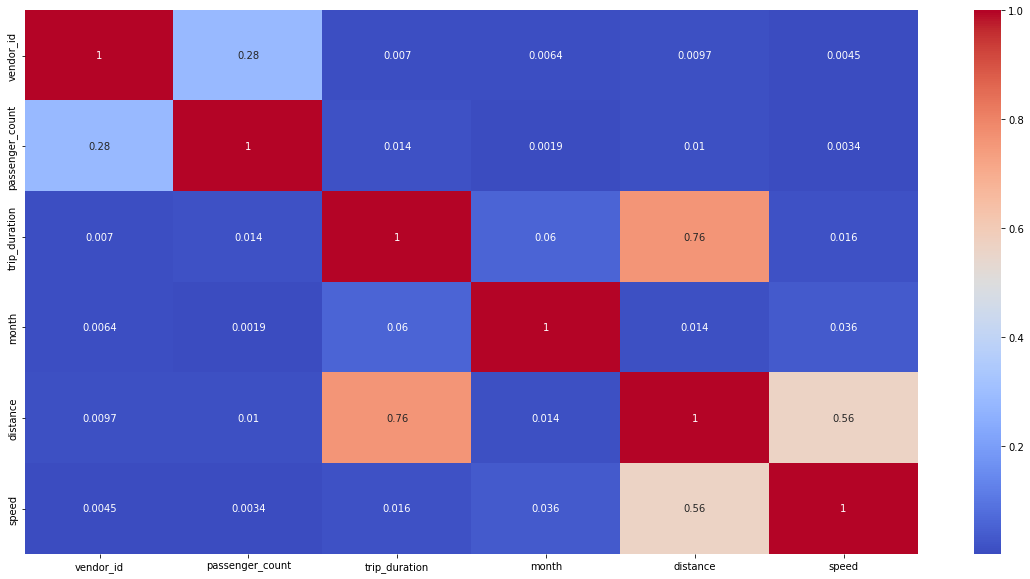

In [ ]:
# Plotting Correlation between variables
plt.figure (figsize= (20,10))
corelation= df.corr()
sns.heatmap(abs(corelation), annot=True, cmap='coolwarm')

* Trip Duration is least correlated with the Vendor ID so we can drop that aswell
* Trip Duration and distance are highly correlated as expected

### Check Multi-Collinearity

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
#define function to call multicollinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ["vendor_id",'passenger_count','store_and_fwd_flag', 'dropoff_weekday', 'pickup_weekday','month','pickup_timeofday']]])

,variables,VIF
0,trip_duration,4.705307
1,distance,6.050123
2,speed,2.916486


### Feature Engineering

Lets Onehot Encode the categorical columns

In [ ]:
# One hot encod
final_df = pd.get_dummies(df, columns=["vendor_id",
                                         "passenger_count",
                                         "store_and_fwd_flag",
                                         "pickup_weekday",
                                         "dropoff_weekday",
                                         "month",
                                         "pickup_timeofday"])

In [ ]:
final_df.head()

,trip_duration,distance,speed,vendor_id_1,vendor_id_2,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_weekday_Friday,pickup_weekday_Monday,pickup_weekday_Saturday,pickup_weekday_Sunday,pickup_weekday_Thursday,pickup_weekday_Tuesday,pickup_weekday_Wednesday,dropoff_weekday_Friday,dropoff_weekday_Monday,dropoff_weekday_Saturday,dropoff_weekday_Sunday,dropoff_weekday_Thursday,dropoff_weekday_Tuesday,dropoff_weekday_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,pickup_timeofday_Afternoon,pickup_timeofday_Evening,pickup_timeofday_Late night,pickup_timeofday_Morning
0,455,1.498523,11.856445,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,663,1.805510,9.803673,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,2124,6.385108,10.822216,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,429,1.485501,12.465739,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,435,1.188590,9.836608,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
final_df.shape

(1206186, 37)

### Correlation Analysis for all Numerical Data

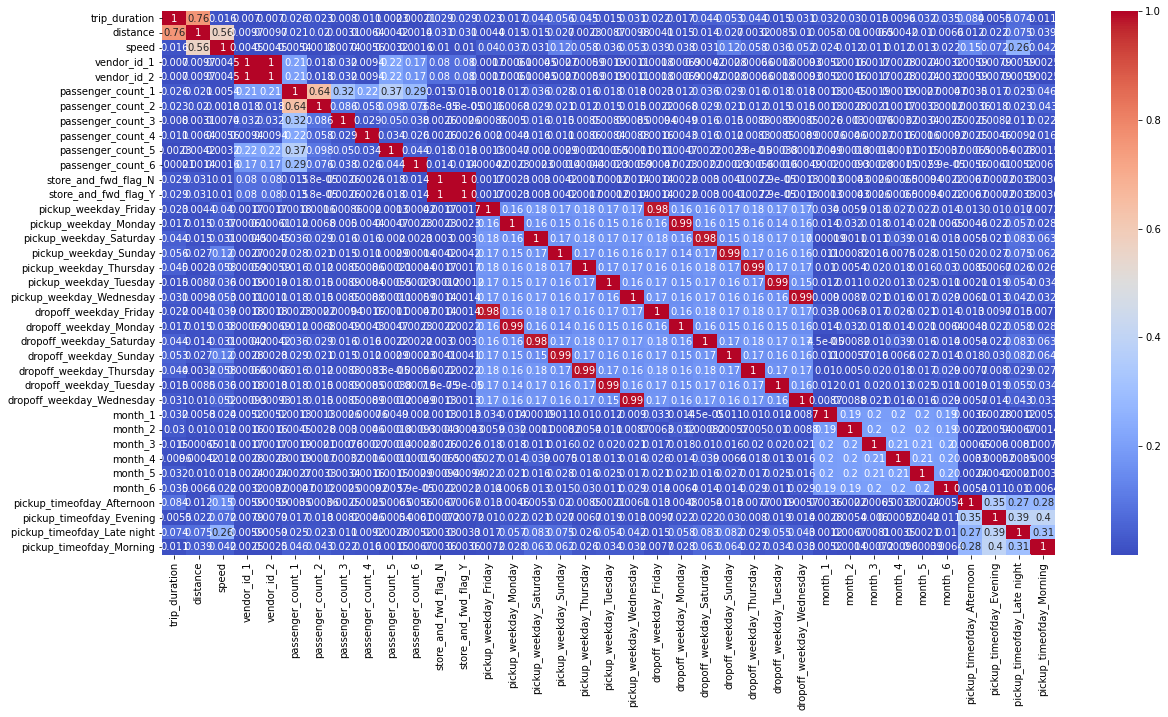

In [ ]:
plt.figure (figsize= (20,10))
corelation= final_df.corr()
sns.heatmap(abs(corelation), annot=True, cmap='coolwarm')

## **Build Model**

In [ ]:
#importing the libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
import math

In [ ]:
# Separating target variable
y = final_df['trip_duration']
y.head()

0     455
1     663
2    2124
3     429
4     435
Name: trip_duration, dtype: int64

In [ ]:
# Defining feature variables(independent variables)
X=final_df.drop('trip_duration',axis=1)
X.head()

,distance,speed,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_weekday_Friday,pickup_weekday_Monday,pickup_weekday_Saturday,pickup_weekday_Sunday,pickup_weekday_Thursday,pickup_weekday_Tuesday,pickup_weekday_Wednesday,dropoff_weekday_Friday,dropoff_weekday_Monday,dropoff_weekday_Saturday,dropoff_weekday_Sunday,dropoff_weekday_Thursday,dropoff_weekday_Tuesday,dropoff_weekday_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,pickup_timeofday_Afternoon,pickup_timeofday_Evening,pickup_timeofday_Late night,pickup_timeofday_Morning
0,1.498523,11.856445,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1.805510,9.803673,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,6.385108,10.822216,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,1.485501,12.465739,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,1.188590,9.836608,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206186 entries, 0 to 1458643
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   distance                     1206186 non-null  float64
 1   speed                        1206186 non-null  float64
 2   vendor_id_1                  1206186 non-null  uint8  
 3   vendor_id_2                  1206186 non-null  uint8  
 4   passenger_count_1            1206186 non-null  uint8  
 5   passenger_count_2            1206186 non-null  uint8  
 6   passenger_count_3            1206186 non-null  uint8  
 7   passenger_count_4            1206186 non-null  uint8  
 8   passenger_count_5            1206186 non-null  uint8  
 9   passenger_count_6            1206186 non-null  uint8  
 10  store_and_fwd_flag_N         1206186 non-null  uint8  
 11  store_and_fwd_flag_Y         1206186 non-null  uint8  
 12  pickup_weekday_Friday        1206186 non-n

In [ ]:
#split train and test data
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(964958, 37)
(241240, 37)


In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression

In [ ]:
# Linear regression model
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train,y_train)
linear_regression.score(X_train,y_train)

0.8311545231507788

In [ ]:
#train predictions
y_pred_train =linear_regression.predict(X_train)

In [ ]:
# Test predictions
y_pred = linear_regression.predict(X_test)

In [ ]:
actual=y_test.tolist()

In [ ]:
predicted=y_pred.tolist()

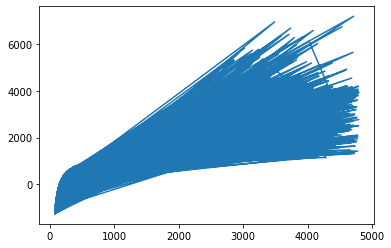

In [ ]:
# Plot between true values and predictions
d = pd.DataFrame({"actual":y_test,"predicted":y_pred})
plt.plot(figsize=(10,7))
plt.plot(y_test,y_pred)
plt.show()

In [ ]:
mean_sq_error_train = []
root_mean_sq_error_train = []
r2_list_train = []
adj_r2_list_train = []

mean_sq_error_test = []
root_mean_sq_error_test = []
r2_list_test = []
adj_r2_list_test = []

In [ ]:
#score matrix (MSE, RMSE, r2, Adjusted r2)
def score_matrix(y_train, y_pred_train, y_test, y_pred_test):
  print(f'**Train dataset score**')
  print("\n")
  # Train performance
  MSE_train = mean_squared_error(y_train, y_pred_train)
  print(f'Mean squared error is: {MSE_train }')
  RMSE_train = math.sqrt(mean_squared_error(y_train, y_pred_train))
  print(f'Root Mean squared error is: {RMSE_train}')
  r2_train = r2_score(y_train, y_pred_train)
  print(f'r2: {r2_train}')
  adjusted_r2_train = 1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print(f'Adjusted r2: {adjusted_r2_train}')
  print("\n")
  #test _performace
  print(f'**Test dataset score**')
  print("\n")
  MSE_test = mean_squared_error(y_test, y_pred_test)
  print(f'Mean squared error is: {MSE_test}')
  RMSE_test = math.sqrt(mean_squared_error(y_test, y_pred_test))
  print(f'Root Mean squared error is: {RMSE_test}')
  r2_test = r2_score(y_test, y_pred_test)
  print(f'r2: {r2_test}')
  adjusted_r2_test = 1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print(f'Adjusted r2: {adjusted_r2_test}')

  mean_sq_error_train.append(MSE_train)
  root_mean_sq_error_train.append(RMSE_train)
  r2_list_train.append(r2_train)
  adj_r2_list_train.append(adjusted_r2_train)

  mean_sq_error_test.append(MSE_test)
  root_mean_sq_error_test.append(RMSE_test)
  r2_list_test.append(r2_test)
  adj_r2_list_test.append(adjusted_r2_test)

In [ ]:
score_matrix(y_train=y_train, y_pred_train = y_pred_train, y_test = y_test, y_pred_test=y_pred )

**Train dataset score**


Mean squared error is: 68093.36966230952
Root Mean squared error is: 260.9470629501499
r2: 0.8311545231507786
Adjusted r2: 0.831129322437819


**Test dataset score**


Mean squared error is: 68148.62921050737
Root Mean squared error is: 261.0529241562089
r2: 0.8324357934861059
Adjusted r2: 0.8324107840067319


### Lasso Model

In [ ]:
# Import and train lasso model
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.01 , max_iter= 3000)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.8311526208985864

#### Cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Cross validation
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,25,50,75,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 75,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -145917.06786826564


In [ ]:
y_pred_train_lasso = lasso_regressor.predict(X_train)

In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
# Printing evaluation metrics
score_matrix(y_train=y_train, y_pred_train = y_pred_train_lasso, y_test = y_test, y_pred_test=y_pred_lasso )

**Train dataset score**


Mean squared error is: 145825.91218657058
Root Mean squared error is: 381.87159122743157
r2: 0.7209220709854055
Adjusted r2: 0.7208793365314553


**Test dataset score**


Mean squared error is: 166334.787717846
Root Mean squared error is: 407.8416208748759
r2: 0.6989682958186667
Adjusted r2: 0.6989221996420707


### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge  = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)
ridge.score(X_train, y_train)

0.831157205722158

In [ ]:
y_pred_train_ridge = ridge.predict(X_train)

In [ ]:
y_pred_ridge = ridge.predict(X_test)

In [ ]:
# Printing evaluation metrics
score_matrix(y_train=y_train, y_pred_train = y_pred_train_ridge, y_test = y_test, y_pred_test=y_pred_ridge )

**Train dataset score**


Mean squared error is: 68092.28781322489
Root Mean squared error is: 260.9449900136519
r2: 0.831157205722158
Adjusted r2: 0.8311320054095805


**Test dataset score**


Mean squared error is: 68149.76849397019
Root Mean squared error is: 261.05510623998566
r2: 0.832432992209959
Adjusted r2: 0.8324079823124858


#### Cross validation

In [ ]:
##cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -68099.46432156401


In [ ]:
#Model Prediction
#train 
y_pred_ridge_cv_train = ridge_regressor.predict(X_train)
y_pred_ridge_cv = ridge_regressor.predict(X_test)

In [ ]:
# Printing evaluation metrics
score_matrix(y_train=y_train, y_pred_train = y_pred_ridge_cv_train, y_test = y_test, y_pred_test=y_pred_ridge_cv )

**Train dataset score**


Mean squared error is: 68092.28781322489
Root Mean squared error is: 260.9449900136519
r2: 0.831157205722158
Adjusted r2: 0.8311320054095805


**Test dataset score**


Mean squared error is: 68149.76849397019
Root Mean squared error is: 261.05510623998566
r2: 0.832432992209959
Adjusted r2: 0.8324079823124858


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_reg = DecisionTreeRegressor( max_leaf_nodes=10, random_state=0)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
dt_y_predicted_train = dt_reg.predict(X_train)

In [ ]:
#prediction on test set
dt_y_predicted =dt_reg.predict(X_test)

In [ ]:
# Printing evaluation metrics
score_matrix(y_train=y_train, y_pred_train = dt_y_predicted_train, y_test = y_test, y_pred_test=dt_y_predicted)

**Train dataset score**


Mean squared error is: 88956.44285521514
Root Mean squared error is: 298.25566692892045
r2: 0.7794220922361992
Adjusted r2: 0.7793891702969058


**Test dataset score**


Mean squared error is: 89424.24879811965
Root Mean squared error is: 299.0388750616208
r2: 0.7801231885872233
Adjusted r2: 0.7800903712887425


#### Cross validation

In [ ]:
param_grid = { 'max_depth': [5, 10, 15, None],
              'max_features': ['auto', 'log2']}

dt = DecisionTreeRegressor()
dt_cv = GridSearchCV(estimator = dt, param_grid = param_grid, cv=3, refit=True)
dt_cv.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15, None],
                         'max_features': ['auto', 'log2']},
             pre_dispatch='2*n_jobs', 

In [ ]:
print("The best fit alpha value is found out to be :" ,dt_cv.best_params_)
print("\nUsing ",dt_cv.best_params_, " the negative mean squared error is: ", dt_cv.best_score_)

The best fit alpha value is found out to be : {'max_depth': None, 'max_features': 'auto'}

Using  {'max_depth': None, 'max_features': 'auto'}  the negative mean squared error is:  0.9997604491875518


In [ ]:
dt_cv_y_pred_train = dt_cv.predict(X_train)

In [ ]:
#prediction on test set
dt_cv_y_predicted =dt_reg.predict(X_test)

In [ ]:
# Printing evaluation metrics
score_matrix(y_train=y_train, y_pred_train = dt_cv_y_pred_train, y_test = y_test, y_pred_test=dt_cv_y_predicted )

**Train dataset score**


Mean squared error is: 0.0
Root Mean squared error is: 0.0
r2: 1.0
Adjusted r2: 1.0


**Test dataset score**


Mean squared error is: 89424.24879811965
Root Mean squared error is: 299.0388750616208
r2: 0.7801231885872233
Adjusted r2: 0.7800903712887425


### RandomForest Regeression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 0)
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'], 
              'n_estimators': [5, 7, 9, 11, 13]}
g_search = GridSearchCV(estimator = rfr,
                        param_grid = param_grid,
                        cv = 3,
                        n_jobs = 5,
                        verbose = 0,
                        return_train_score=True)
g_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [ ]:
print("The best fit alpha value is found out to be :" ,g_search.best_params_)
print("\nUsing ",g_search.best_params_, " the negative mean squared error is: ", g_search.best_score_)

The best fit alpha value is found out to be : {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 13}

Using  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 13}  the negative mean squared error is:  0.9999178750406125


In [ ]:
#prediction on train set
rf_cv_y_pred_train = g_search.predict(X_train)

In [ ]:
#prediction on test set
rf_cv_y_predicted =g_search.predict(X_test)

In [ ]:
#measure accuracy/ test performance
import math
math.sqrt(mean_squared_error(y_test, rf_cv_y_predicted))

5.552425445549909

In [ ]:
# Train performance
math.sqrt(mean_squared_error(y_train, rf_cv_y_pred_train))

2.244641404117888

In [ ]:
# Train performance
r2_score(y_train, rf_cv_y_pred_train)

0.9999875106590441

In [ ]:
#test performance
r2_score(y_test,rf_cv_y_predicted)

0.999924104116359

In [ ]:
# Printing evaluation metrics
score_matrix(y_train=y_train, y_pred_train = rf_cv_y_pred_train, y_test = y_test, y_pred_test=rf_cv_y_predicted )

**Train dataset score**


Mean squared error is: 5.038415033080324
Root Mean squared error is: 2.244641404117888
r2: 0.9999875106590441
Adjusted r2: 0.9999875087431992


**Test dataset score**


Mean squared error is: 30.829428328390104
Root Mean squared error is: 5.552425445549909
r2: 0.999924104116359
Adjusted r2: 0.9999240924740521


### XGBoost

In [ ]:
# importing xgboost model
import xgboost as XGB

In [ ]:
# create xgboost regression model
xg_model = XGB.XGBRegressor()
xgb_parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.0001,0.01, 0.05, 0.1], #so called `eta` value
              'max_depth': [5, 6, 7],
              'subsample': [0.7],
              'colsample_bytree': [0.7]}

In [ ]:
from sklearn.model_selection import GridSearchCV
# cross calidation
xg_cv = GridSearchCV(xg_model,
                     xgb_parameters,
                     cv=3,
                     n_jobs=5,
                     verbose=True)
#evalution model
xg_cv.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  36 out of  36 | elapsed: 59.9min finished


[16:07:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.0001, 0.01, 0.05, 0.1],
              

In [ ]:
print("The best fit alpha value is found out to be :" ,xg_cv.best_params_)
print("\nUsing ",xg_cv.best_params_, " the negative mean squared error is: ", xg_cv.best_score_)

The best fit alpha value is found out to be : {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.7}

Using  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.7}  the negative mean squared error is:  0.9992775769617822


In [ ]:
#prediction on train set
xgb_cv_y_pred_train = xg_cv.predict(X_train)

In [ ]:
#prediction on test set
xgb_cv_y_predicted =xg_cv.predict(X_test)

In [ ]:
# Printing evaluation metrics
score_matrix(y_train=y_train, y_pred_train = xgb_cv_y_pred_train, y_test = y_test, y_pred_test=xgb_cv_y_predicted )

**Train dataset score**


Mean squared error is: 221.41917943227838
Root Mean squared error is: 14.880160598336241
r2: 0.9994509652390503
Adjusted r2: 0.9994508832939033


**Test dataset score**


Mean squared error is: 255.54723670817555
Root Mean squared error is: 15.985844885653544
r2: 0.9993716591156433
Adjusted r2: 0.9993715653338106


### Deep Learning Model

In [ ]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(42)

# Create the model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1,activation='relu')
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mse, 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mse'])

# Fit the model
history = model.fit(X_train, y_train,
            validation_data=(X_test,y_test),
            epochs=25)

Epoch 1/25
30155/30155 [==============================] - 109s 4ms/step - loss: 26255.4668 - mse: 26255.4668 - val_loss: 8006.9795 - val_mse: 8006.9795
Epoch 2/25
30155/30155 [==============================] - 108s 4ms/step - loss: 6578.9639 - mse: 6578.9639 - val_loss: 1931.9946 - val_mse: 1931.9946
Epoch 3/25
30155/30155 [==============================] - 117s 4ms/step - loss: 1755.1327 - mse: 1755.1327 - val_loss: 1087.8323 - val_mse: 1087.8323
Epoch 4/25
30155/30155 [==============================] - 108s 4ms/step - loss: 1444.0762 - mse: 1444.0762 - val_loss: 1398.6792 - val_mse: 1398.6792
Epoch 5/25
30155/30155 [==============================] - 108s 4ms/step - loss: 1257.8202 - mse: 1257.8202 - val_loss: 1103.9495 - val_mse: 1103.9495
Epoch 6/25
30155/30155 [==============================] - 116s 4ms/step - loss: 1173.1605 - mse: 1173.1605 - val_loss: 847.0732 - val_mse: 847.0732
Epoch 7/25
30155/30155 [==============================] - 107s 4ms/step - loss: 1085.6431 - mse: 108

In [ ]:
dl_tran_preds = model.predict(X_train)

In [ ]:
# Making predictions
dl_preds = model.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['mse']
  val_accuracy = history.history['val_mse']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('MSE')
  plt.xlabel('Epochs')
  plt.legend();

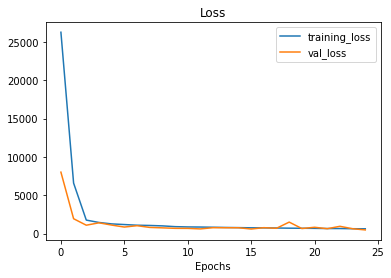

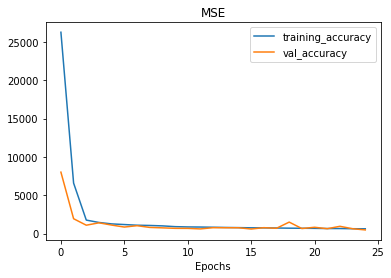

In [ ]:
plot_loss_curves(history)

In [ ]:
# Printing evaluation metrics
score_matrix(y_train=y_train, y_pred_train = dl_tran_preds, y_test = y_test, y_pred_test=dl_preds)

**Train dataset score**


Mean squared error is: 460.23194755865956
Root Mean squared error is: 21.453017213405193
r2: 0.9988588010399226
Adjusted r2: 0.9988586307124258


**Test dataset score**


Mean squared error is: 473.10971036227426
Root Mean squared error is: 21.75108526860842
r2: 0.9988367153656753
Adjusted r2: 0.9988365417418229


From above all Models Randomforest did the better job

In [ ]:
importance_df= pd.DataFrame({'Features': X.describe().columns, 'Feature_importance': list(g_search.best_estimator_.feature_importances_)})
importance_df

,Features,Feature_importance
0,distance,6.779297e-01
1,speed,3.220240e-01
2,vendor_id_1,1.592076e-06
3,vendor_id_2,2.089192e-06
4,passenger_count_0,1.140507e-12
5,passenger_count_1,2.007217e-06
6,passenger_count_2,1.742980e-06
7,passenger_count_3,7.452925e-07
8,passenger_count_4,5.690481e-07
9,passenger_count_5,6.452844e-07


In [ ]:
#sorting
importance_df.sort_values(by=['Feature_importance'],ascending=False,inplace=True)

Lets see importance bar graph

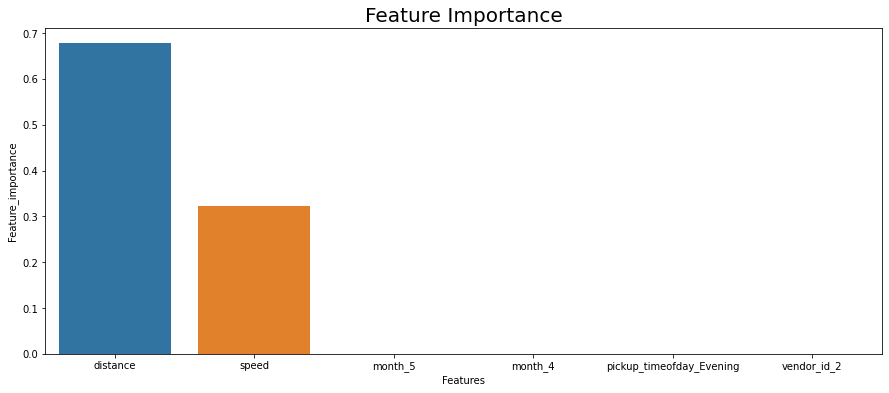

In [ ]:
# Ploting feature importances
plt.figure(figsize=(15,6))
plt.title('Feature Importance', fontsize=20)
sns.barplot(x='Features',y="Feature_importance", data=importance_df[:6])
plt.show()

Clearly, we can see distance is the top contributor to trip duration followed by speed.

Plotting the error term distribution

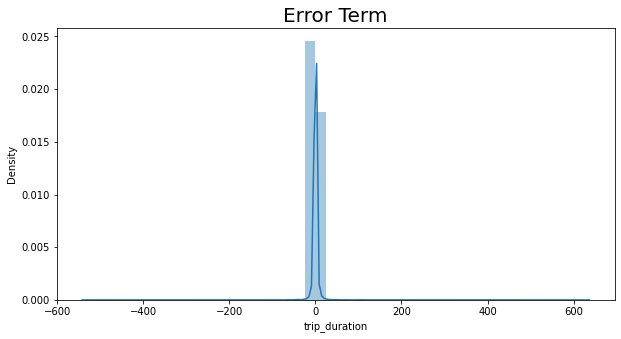

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(y_test - rf_cv_y_predicted )
plt.title('Error Term', fontsize=20)
plt.show()

Clearly we can see that error in prediction is less than 2 minutes.

In [ ]:
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor','Random Forest','XGBoost Regressor','Neural Network']
train_mse= [68093.3696, 145825.9121, 68092.2878, 88956.4428, 5.03841, 221.4191, 460.2319]
train_rmse= [260.9470, 381.8715, 260.9449, 298.2556, 2.2446, 14.8801, 21.4530]
train_r2= [0.831, 0.7209, 0.8311, 0.7794, 0.9999, 0.9994, 0.9988]
train_adjusted_r2= [0.8311, 0.7208, 0.8311, 0.77938, 0.9999, 0.9994, 0.9988]

In [ ]:
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor','Random Forest','XGBoost Regressor','Neural Network']
test_mse= [68148.629,166334.787,68149.768,89424.248,24.063,255.547,473.1097]
test_rmse= [261.052,407.841,261.055,299.038,4.905,15.985,21.751]
test_r2= [0.83243,0.6989,0.8324,0.7801,0.999,0.999,0.998]
test_adjusted_r2= [0.83241,0.6989,0.8324,0.7800,0.999,0.999,0.998]

**Models Summary for the Train data.**

In [ ]:
# creating a train data metrics dataframe
Train_data_df=pd.DataFrame({'Model Name': models, 'Train MSE': train_mse, 'Train RMSE': train_rmse, 'Train R^2': train_r2, 
                            'Train Adjusted R^2': train_adjusted_r2})
Train_data_df

,Model Name,Train MSE,Train RMSE,Train R^2,Train Adjusted R^2
0,Linear Regression,68093.36960,260.9470,0.8310,0.83110
1,Lasso Regression,145825.91210,381.8715,0.7209,0.72080
2,Ridge Regression,68092.28780,260.9449,0.8311,0.83110
3,DecisionTree Regressor,88956.44280,298.2556,0.7794,0.77938
4,Random Forest,5.03841,2.2446,0.9999,0.99990
5,XGBoost Regressor,221.41910,14.8801,0.9994,0.99940
6,Neural Network,460.23190,21.4530,0.9988,0.99880


**Models Summary for the test data.**


In [ ]:
# creating a test data metrics dataframe
Test_data_df= pd.DataFrame({'Model Name': models, 'Test MSE': test_mse, 'Test RMSE': test_rmse, 'Test R^2': test_r2, 
                            'Test Adjusted R^2': test_adjusted_r2})
Test_data_df

,Model Name,Test MSE,Test RMSE,Test R^2,Test Adjusted R^2
0,Linear Regression,68148.6290,261.052,0.83243,0.83241
1,Lasso Regression,166334.7870,407.841,0.69890,0.69890
2,Ridge Regression,68149.7680,261.055,0.83240,0.83240
3,DecisionTree Regressor,89424.2480,299.038,0.78010,0.78000
4,Random Forest,24.0630,4.905,0.99900,0.99900
5,XGBoost Regressor,255.5470,15.985,0.99900,0.99900
6,Neural Network,473.1097,21.751,0.99800,0.99800


# **Conclusion**

*   We can see that MSE, RMSE,R^2and Adjusted R^2 which are the metrics used to evaluate the performance of regression model of **Random Forest**, **XGBoost Regressor** and **Neural Network** are not varying much during traing and testing time.
 
 
*   The Linear models don't show good performance on our training and testing environment.

 
 
 
 
*   From above table we can conclude  that **Random Forest Regressor** is the best models as compare to the other models to predict the trip duration for a particular taxi.